---
## Projeto: RNAseq  - Desafio I2A2
---

<div style="text-align: center;">
<img src="https://prontoclinicafortaleza.com.br/wp-content/uploads/2018/01/dna-1.png" />
</div>

### 🎌 Objetivo
Esse desafio tem como objetivo encontrar pessoas são parentes conforme as características genéticas.  Utilizaremos o arquivo csv composto de "read counts".

### 💻 Metodologia CRISP-DM 
Para esse desafio iremos utilizar a metodologia CRISP-DM  *(Cross Industry Standard Process for Data Mining)*. Neste notebook, iremos a metodologia CRISP-DM *(Cross Industry Standard Processo for Data Mining)*. 

As etapas do CRISP - DM: 
- Entedimento do Negócio: Nessa fase, é necessário compreender o problema a ser resolvido, buscando todos os detalhes e como irá impactar no negócio. Essa etapa é fundamental para alcançar uma boa solução.

- Compreensão dos Dados: Consiste em organizar os dados e documentá-los. Seria uma sequência de: *defina--> colete-->explore*

- Preparação dos Dados: Agora é parte da preparar os dados. Verificar os formatos, tratamentos, análises descritivas e etc. É a etapa mais extensa, cerca de 70-90% do projeto total. Caso não seja feita corretamente influenciará no resultado. 

- Modelagem: etapa que consiste na aplicação de técnicas de modelagem conforme o problema a ser solucionada. Essa é uma das etapas que será executadas várias vezes e conforme os resultados há a necessidade de voltar nas etapas anteriores para ajustar os dados.

- Avaliação: É que consiste em realizar testes como a solução gerada e validar se atende as necessidades do negócio. Verificar que algum dado que tenha sido esquecido ou não tratado corretamento e que esteja inferindo no resultado da solução.

<div style="text-align: center;">
<img src="https://miro.medium.com/max/1400/1*d-WD7tNAn9s5i2Z0tDCsag.png" width="800" height="800" />
<p>
    <b>Fonte: Florian Heinrichs<b>
</p>
</div>

<div>
<img src="images/fase1.png" height="350"  width="1500" />
</div>

Para compreender o contexto do negócio, precisamos conteituar o que é DNA, RNA e o sequenciamento de Genes. 

#### DNA

O DNA (ácido desoxirribonucleico) foi descoberto em 1869, mas somente sua estrutura foi descrita em 1953 por James Watson e Francis Crick no trabalho *"Molecular structure of the nucleic acids"*. O DNA é um tipo de ácido nucleico que tem papel fundamental por armazenar características genéticas dos seres vivos, considerado o portador da mensagem genética. Por meio do DNA é possível idenficar pessoas, realizar testes de paternidade, determinar crimes e identificar doenças até antes das mesmas se manifestarem. Outra função do DNA é funcionar como molde para a síntese da molécula de RNA, sendo fundamental para a síntese de proteínas (DNA-->RNA-->Proteína)
O DNA é composto por nucleotídes, os quais são compostos por três partes:
- Uma pentose - Um açúcar que apresenta moléculas formadas por cinco átomos de carbono
- Bases Nitrogenadas - Adenina(A), Timina (T), Citosina (C) e Guanina (G). Onde C e T possuem apenas um anel aromático que são chamadas de pirimidinas, e as bases A e G possuem dois anéis aromáticos que são chamadas de purinas.
- Um ou mais grupos fosfato - Um radical de ácido fosfórico

<div style="text-align: center;">
<img src="https://s5.static.brasilescola.uol.com.br/be/2022/01/nucleotideo.jpg" />
<p>
    Fonte: https://brasilescola.uol.com.br/biologia/nucleotideo.htm
</p>
</div>

Sua estrutura foi chamada de dupla-hélice, parecido com uma escada em caracol, onde as bases nitrogenadas formam os degraus, e as cadeias de açúcar e fosfato são os corrimãos. Os dois filamentos do DNA se


 unem-se através de pontes de hidrogênio que formam entre as bases nitrogenadas dos nucleotídeos.  Essa ponte deve seguir a união de uma base  de pirimidina com uma base de purina, então o pareamento entre as bases ocorrem das seguintes formas: 
- Adenina é pareada apenas com Timina;
- Guanina é pareada sempre com Citosina. 

<div style="text-align: center;">
<img src="https://lh4.googleusercontent.com/n-klyc0jbI4WiQ39ZjQz6VuTVP0pnIZCL9HPVu9NNxWLjLapJ0RB7ULu4kwQeYuKgkXon49y4SrC23DryQ7usDf8F5-CYmnEmEjqKdh51RfpMvbMFOeFuHlQ8uKYrm8iH8KVz8mW" />
<p>
    Fonte: https://www.nilofrantz.com.br/dna-caracteristicas-e-funcoes/
</p>
</div>


O DNA é encontrado no interior do núcleo celular e nas mitocôndrias. Todos os tecidos do corpo humano como pele, fígado, coração são constituídos por inúmeras células e cada célula possui moléculas de DNA, para que todo o DNA seja Assim, é importante conhecer os genes, cromossomos e genomas.


#### Genoma, Genes e Cromossomos
O Genoma Humano  é um código genético que possui toda a informação de hereditária de um indivíduo codificada no DNA, organizado dentros dos 23 pares de cromossomos. O Genoma é a soma dos genes que define como vai se desenvolver um ser vivo, é através da transmissão dos genes que os traços físicos e comportamentais são herdados. 
As diferentes sequência de DNA formam os cromossomos que estão localizados no núcleo das células. O ser humano possuem 46 cromossomos, divididos em pares, sendo 44 autossômicos (quando não são sexuais) e 2 sexuais

<div>
<img src="images/fase2.png" height="350"  width="15000" />
</div>

Para esse desafio, utilizaremos a base "read_counts" que foram obtidos da transcrição de **DNA->RNA**.  Esse arquivo é no formato tabular composto com atributos e instâncias. 

In [1]:
#importação das bibliotecas
import pandas as pd 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#statistics
from scipy import stats

#models 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#metrics
from sklearn.metrics import silhouette_score, silhouette_samples

#mensagens de warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#carrega a base de dados 
df = pd.read_excel('data/readcounts.xlsx', engine="openpyxl", index_col=0)

In [3]:
#carregando as primeiras linhas da nossa base
df.head()

H223  H224  H225  H226  H227  H228  H229  H230  H231  H232  \
ENSG00000000003     0     0     0     1     0     0     0     0     1     0   
ENSG00000000005     0     0     0     0     0     0     0     0     0     0   
ENSG00000000419  1216  1228  1022   912   491   449   466   727   774   576   
ENSG00000000457   189   114   110   289   186   148   169   258   145   131   
ENSG00000000460    74    38    55   127    30    17    45   100    33     8   

                 ...  H261  H262  H263  H264  H265  H266  H267  H268  H269  \
ENSG00000000003  ...     0     1     0     1     0     2     0     0     1   
ENSG00000000005  ...     1     0     0     0     0     0     0     0     0   
ENSG00000000419  ...   980   932   360   450   484   926   803   630   537   
ENSG00000000457  ...   117   286   137    90   105   275   101    56    87   
ENSG00000000460  ...    28   157    34    20    15   139    54    25    21   

                 H270  
ENSG00000000003     0  
ENSG00000000005     0  
ENSG00000000419   582  
ENSG00000000457    81  
ENSG00000000460    47  

[5 rows x 48 columns]

In [4]:
#dimensões do dataframe
print('O dataset possui {} genes e {} indivíduos'.format(df.shape[0], df.shape[1]))

O dataset possui 65215 genes e 48 indivíduos


In [5]:
#verificar os tipos das variáveis
df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [6]:
#verificar se existem dados nulos
df.isnull().sum()

H223    0
H224    0
H225    0
H226    0
H227    0
H228    0
H229    0
H230    0
H231    0
H232    0
H233    0
H234    0
H235    0
H236    0
H237    0
H238    0
H239    0
H240    0
H241    0
H242    0
H243    0
H244    0
H245    0
H246    0
H247    0
H248    0
H249    0
H250    0
H251    0
H252    0
H253    0
H254    0
H255    0
H256    0
H257    0
H258    0
H259    0
H260    0
H261    0
H262    0
H263    0
H264    0
H265    0
H266    0
H267    0
H268    0
H269    0
H270    0
dtype: int64

Como podemos observar não possuímos dados ausentes no nosso dataframe. E para continuar nossa análise iremos criar um dataframe cópia para realizar o tratamento dos dados.

<div>
<img src="images/fase3.png" height="350"  width="1500" />
</div>

In [7]:
#criando uma cópia do dataframe original para a preparação dos dados
df_copy = df.copy()

In [8]:
#visualização das primeiras linhas
df_copy.head()

H223  H224  H225  H226  H227  H228  H229  H230  H231  H232  \
ENSG00000000003     0     0     0     1     0     0     0     0     1     0   
ENSG00000000005     0     0     0     0     0     0     0     0     0     0   
ENSG00000000419  1216  1228  1022   912   491   449   466   727   774   576   
ENSG00000000457   189   114   110   289   186   148   169   258   145   131   
ENSG00000000460    74    38    55   127    30    17    45   100    33     8   

                 ...  H261  H262  H263  H264  H265  H266  H267  H268  H269  \
ENSG00000000003  ...     0     1     0     1     0     2     0     0     1   
ENSG00000000005  ...     1     0     0     0     0     0     0     0     0   
ENSG00000000419  ...   980   932   360   450   484   926   803   630   537   
ENSG00000000457  ...   117   286   137    90   105   275   101    56    87   
ENSG00000000460  ...    28   157    34    20    15   139    54    25    21   

                 H270  
ENSG00000000003     0  
ENSG00000000005     0  
ENSG00000000419   582  
ENSG00000000457    81  
ENSG00000000460    47  

[5 rows x 48 columns]

In [9]:
#análise estatística  do dataframe
df_copy.describe()

H223           H224           H225           H226  \
count   65215.000000   65215.000000   65215.000000   65215.000000   
mean      297.584666     277.588806     253.373089     297.890869   
std      3200.623699    2684.445184    2648.761188    2919.101933   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         7.000000       7.000000       6.000000       8.000000   
max    405074.000000  264277.000000  311912.000000  360936.000000   

                H227           H228           H229          H230  \
count   65215.000000   65215.000000   65215.000000   65215.00000   
mean      241.974515     267.768397     264.355823     256.05005   
std      4007.462138    4983.802048    4510.853390    2337.51061   
min         0.000000       0.000000       0.000000       0.00000   
25%         0.000000       0.000000       0.000000       0.00000   
50%         0.000000       0.000000       0.000000       0.00000   
75%         4.000000       4.000000       5.000000       7.00000   
max    451971.000000  699754.000000  588000.000000  230319.00000   

                H231           H232  ...           H261           H262  \
count   65215.000000   65215.000000  ...   65215.000000   65215.000000   
mean      253.095975     261.106264  ...     282.995538     316.435099   
std      3627.061502    5952.105399  ...    2823.006916    2932.063940   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         4.000000       3.000000  ...       9.000000      11.000000   
max    461919.000000  944074.000000  ...  317755.000000  390309.000000   

                H263           H264           H265           H266  \
count   65215.000000   65215.000000   65215.000000   65215.000000   
mean      181.509821     192.334540     205.687863     303.351054   
std      2657.960343    2550.636099    2819.363756    2585.618338   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         4.000000       5.000000       5.000000      11.000000   
max    295325.000000  260679.000000  303450.000000  306526.000000   

                H267           H268           H269           H270  
count   65215.000000   65215.000000   65215.000000   65215.000000  
mean      228.280948     185.078816     205.491283     193.315495  
std      3980.021401    4728.704801    3900.712431    1732.755214  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         4.000000       3.000000       4.000000       6.000000  
max    551755.000000  771846.000000  583008.000000  169504.000000  

[8 rows x 48 columns]

Como podemos observar vários indivíduos possuem *ensembles (genes)* igual a 0, o que significa a ausência desse gene. Então, iremos analisar se existe algum *ensemble* ausente em todos os indivíduos. Para isso, iremos criar a coluna *TOTAL_GENES* que receberá a soma dos valores de cada *ensemble*.

In [10]:
#criando a coluna total_genes que receberá a soma dos valores de cada ensemble
df_copy['TOTAL_GENES'] = df_copy.sum(axis=1)

In [11]:
#visualizando as primeiras linhas 
df_copy.head()

H223  H224  H225  H226  H227  H228  H229  H230  H231  H232  \
ENSG00000000003     0     0     0     1     0     0     0     0     1     0   
ENSG00000000005     0     0     0     0     0     0     0     0     0     0   
ENSG00000000419  1216  1228  1022   912   491   449   466   727   774   576   
ENSG00000000457   189   114   110   289   186   148   169   258   145   131   
ENSG00000000460    74    38    55   127    30    17    45   100    33     8   

                 ...  H262  H263  H264  H265  H266  H267  H268  H269  H270  \
ENSG00000000003  ...     1     0     1     0     2     0     0     1     0   
ENSG00000000005  ...     0     0     0     0     0     0     0     0     0   
ENSG00000000419  ...   932   360   450   484   926   803   630   537   582   
ENSG00000000457  ...   286   137    90   105   275   101    56    87    81   
ENSG00000000460  ...   157    34    20    15   139    54    25    21    47   

                 TOTAL_GENES  
ENSG00000000003           12  
ENSG00000000005            2  
ENSG00000000419        34038  
ENSG00000000457         6547  
ENSG00000000460         2156  

[5 rows x 49 columns]

Agora, iremos analisar quantos *ensembles* estão ausentes em todos os indivíduos

In [12]:
ind = df_copy[df_copy['TOTAL_GENES'] == 0]
print(f"Total de ensembles ausentes: {ind.shape[0]}")

Total de ensembles ausentes: 20537


Como podemos observar possuímos **20537** *ensambles* ausentes em todos os indivíduos, o que não irá ser significante no nosso agrupamento. Dessa forma, podemos remover esses *ensembles*

In [13]:
#filtrando a coluna total_genes for diferente de 0
df_copy = df_copy[df_copy['TOTAL_GENES'] != 0]
print(f"Quantidade de ensembles presentes: {df_copy.shape[0]}")

Quantidade de ensembles presentes: 44678


In [14]:
#removendo a coluna total_genes
df_copy.drop('TOTAL_GENES', axis='columns',inplace=True)

In [15]:
#dimensões do dataframe
print('O dataset tratado possui {} genes e {} indivíduos'.format(df_copy.shape[0], df_copy.shape[1]))

O dataset tratado possui 44678 genes e 48 indivíduos


In [16]:
df_copy.head()

H223  H224  H225  H226  H227  H228  H229  H230  H231  H232  \
ENSG00000000003     0     0     0     1     0     0     0     0     1     0   
ENSG00000000005     0     0     0     0     0     0     0     0     0     0   
ENSG00000000419  1216  1228  1022   912   491   449   466   727   774   576   
ENSG00000000457   189   114   110   289   186   148   169   258   145   131   
ENSG00000000460    74    38    55   127    30    17    45   100    33     8   

                 ...  H261  H262  H263  H264  H265  H266  H267  H268  H269  \
ENSG00000000003  ...     0     1     0     1     0     2     0     0     1   
ENSG00000000005  ...     1     0     0     0     0     0     0     0     0   
ENSG00000000419  ...   980   932   360   450   484   926   803   630   537   
ENSG00000000457  ...   117   286   137    90   105   275   101    56    87   
ENSG00000000460  ...    28   157    34    20    15   139    54    25    21   

                 H270  
ENSG00000000003     0  
ENSG00000000005     0  
ENSG00000000419   582  
ENSG00000000457    81  
ENSG00000000460    47  

[5 rows x 48 columns]

Como iremos desenvolver um Modelo de Clusterização, o ideal para utilização de algoritmos baseados em cálculo de distância é que esse dados sejam padronizados. Então, para isso iremos verificar se os nossos dados precisam ser normalizados. Para isso, iremos utilizar a base transposta para que os *ensembles* sejam as colunas e os indivíduos as linhas

In [17]:
df_copy = df_copy.T
df_copy.head()

ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  \
H223                0                0             1216              189   
H224                0                0             1228              114   
H225                0                0             1022              110   
H226                1                0              912              289   
H227                0                0              491              186   

      ENSG00000000460  ENSG00000000938  ENSG00000000971  ENSG00000001036  \
H223               74            31895                2              763   
H224               38            23361                3              712   
H225               55            27944                0              956   
H226              127            41846                6             1104   
H227               30            11929               14              136   

      ENSG00000001084  ENSG00000001167  ...  ENSG00000281891  ENSG00000281892  \
H223             8963             1589  ...                0                1   
H224            26794             1734  ...                0                0   
H225             8027             1341  ...                0                0   
H226              716             1053  ...                0                0   
H227              745              730  ...                0                0   

      ENSG00000281896  ENSG00000281899  ENSG00000281903  ENSG00000281904  \
H223               19                0               18                0   
H224               18                0                0                0   
H225               11                0               10                0   
H226               23                0               36                0   
H227                7                1               17                0   

      ENSG00000281909  ENSG00000281912  ENSG00000281918  ENSG00000281920  
H223                0                1                0                0  
H224                0                1                0                0  
H225                0                0                0                0  
H226                0                2                0                0  
H227                0                0                0                0  

[5 rows x 44678 columns]

In [18]:
#dimensões do dataframe
print('O dataset possui {} genes e {} indivíduos'.format(df.shape[0], df.shape[1]))

O dataset possui 65215 genes e 48 indivíduos


Com a nossa base tratada iremos utilizar o teste de normalidade **Shapiro-Wilk**. É um dos testes mais populares para testar a normalidade, cujo objetivo é avaliar se uma distribuição é semelhante a uma distribuição normal. Onde tem a hipótese: 
- HO = A amostra vem de uma distribuição normal 
- HA = A amostra não vem de uma distribuição normal
Para aplicar esse teste, iremos utilizar a lib *scipy.stast.shapiro* 

In [19]:
#teste de SHAPIRO WILK
def test_shapiro(df):
    sum_shapiro = 0
    for col in df.columns:
        result = stats.shapiro(df[col])
        print(f"statistical value = {result[0]} | p of Shapiro-Wilk {result[1]}")
    if result[1] > 0.05:
        sum_shapiro = sum_shapiro+1
        print('Com 98% de confiança, os dados são similares a uma distribuição normal segundo o teste de Shapiro-Wilk')
    else:
        print('Com 98% de confiança, os dados NÃO são similares a uma distribuição normal segundo o teste de Shapiro-Wilk')

In [20]:
test_shapiro(df_copy)

statistical value = 0.5252773761749268 | p of Shapiro-Wilk 3.0923236193913795e-11
statistical value = 0.2036094069480896 | p of Shapiro-Wilk 1.087087674923621e-14
statistical value = 0.9619764089584351 | p of Shapiro-Wilk 0.12134300172328949
statistical value = 0.8677477836608887 | p of Shapiro-Wilk 6.666422268608585e-05
statistical value = 0.8217926025390625 | p of Shapiro-Wilk 4.2000347093562596e-06
statistical value = 0.8664381504058838 | p of Shapiro-Wilk 6.121914339018986e-05
statistical value = 0.8581200838088989 | p of Shapiro-Wilk 3.597754403017461e-05
statistical value = 0.8817691802978516 | p of Shapiro-Wilk 0.0001706210896372795
statistical value = 0.5777126550674438 | p of Shapiro-Wilk 1.5853469925719565e-10
statistical value = 0.924807608127594 | p of Shapiro-Wilk 0.004410488996654749
statistical value = 0.9535959362983704 | p of Shapiro-Wilk 0.055686309933662415
statistical value = 0.7174783945083618 | p of Shapiro-Wilk 2.7384599476931726e-08
statistical value = 0.8945592

Como podemos ver, os nossos dados não possuem uma distribuição normal segundo o teste de Shapiro-Wilk necessitando de que seja realizada uma transformação de dados, para que o modelo não fique enviesada por variáveis de maior grandeza. Existem métodos de padronização e normalização para fazer esse tratamento. 
 
- **Padronização** é um método de colocar os dados em uma mesma escola. Mas, na padronização colocamos a média dos dados em 0 e o desvio padrão em 1.
- **Normalização** é um método que coloca os dados no intervalo entre 0 e 1 ou -1 e 1, caso haja valores negativos. 

Dessa forma, iremos escolheremos padronizar os dados utilizando *StandardScaler*

In [21]:
#criando um objeto para realizar a padronização
standard = StandardScaler()

In [22]:
#separando as colunas
cols = df_copy.columns
cols

Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000281891', 'ENSG00000281892', 'ENSG00000281896',
       'ENSG00000281899', 'ENSG00000281903', 'ENSG00000281904',
       'ENSG00000281909', 'ENSG00000281912', 'ENSG00000281918',
       'ENSG00000281920'],
      dtype='object', length=44678)

In [23]:
#separando os valores para padronização
X = df_copy.values
X

array([[   0,    0, 1216, ...,    1,    0,    0],
       [   0,    0, 1228, ...,    1,    0,    0],
       [   0,    0, 1022, ...,    0,    0,    0],
       ...,
       [   0,    0,  630, ...,    0,    0,    0],
       [   1,    0,  537, ...,    0,    0,    0],
       [   0,    0,  582, ...,    0,    0,    0]], dtype=int64)

In [24]:
#aplicação da padronização
X = standard.fit_transform(X)
X

array([[-0.48038446, -0.20851441,  2.27936827, ..., -0.01763638,
        -0.20851441, -0.14586499],
       [-0.48038446, -0.20851441,  2.33333112, ..., -0.01763638,
        -0.20851441, -0.14586499],
       [-0.48038446, -0.20851441,  1.40696887, ..., -0.86418275,
        -0.20851441, -0.14586499],
       ...,
       [-0.48038446, -0.20851441, -0.35581754, ..., -0.86418275,
        -0.20851441, -0.14586499],
       [ 1.44115338, -0.20851441, -0.77402962, ..., -0.86418275,
        -0.20851441, -0.14586499],
       [-0.48038446, -0.20851441, -0.57166894, ..., -0.86418275,
        -0.20851441, -0.14586499]])

In [25]:
#criando uma base padronizada 
df_norm = pd.DataFrame(X, columns=[cols])
df_norm.head()

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457  \
0       -0.480384       -0.208514        2.279368        0.844148   
1       -0.480384       -0.208514        2.333331       -0.359390   
2       -0.480384       -0.208514        1.406969       -0.423578   
3        1.441153       -0.208514        0.912309        2.448864   
4       -0.480384       -0.208514       -0.980887        0.796006   

  ENSG00000000460 ENSG00000000938 ENSG00000000971 ENSG00000001036  \
0        0.827486        1.424503       -0.570810        0.715149   
1       -0.196795        0.627346       -0.367856        0.583795   
2        0.286893        1.055442       -0.976720        1.212233   
3        2.335455        2.354021        0.241009        1.593416   
4       -0.424413       -0.440511        1.864648       -0.899731   

  ENSG00000001084 ENSG00000001167  ... ENSG00000281891 ENSG00000281892  \
0        0.525646        1.945508  ...       -0.145865        3.872983   
1        2.681840        2.375359  ...       -0.145865       -0.258199   
2        0.412461        1.210315  ...       -0.145865       -0.258199   
3       -0.471613        0.356542  ...       -0.145865       -0.258199   
4       -0.468107       -0.600989  ...       -0.145865       -0.258199   

  ENSG00000281896 ENSG00000281899 ENSG00000281903 ENSG00000281904  \
0        0.953977       -0.145865        1.004826       -0.145865   
1        0.806265       -0.145865       -0.803861       -0.145865   
2       -0.227724       -0.145865        0.200965       -0.145865   
3        1.544827       -0.145865        2.813514       -0.145865   
4       -0.818574        6.855655        0.904344       -0.145865   

  ENSG00000281909 ENSG00000281912 ENSG00000281918 ENSG00000281920  
0       -0.226042       -0.017636       -0.208514       -0.145865  
1       -0.226042       -0.017636       -0.208514       -0.145865  
2       -0.226042       -0.864183       -0.208514       -0.145865  
3       -0.226042        0.828910       -0.208514       -0.145865  
4       -0.226042       -0.864183       -0.208514       -0.145865  

[5 rows x 44678 columns]

<div>
<img src="images/fase4.png" height="350"  width="1500" />
</div>

Nesta fase, é onde será realizado técnicas de modelagem de dados. Como iremos clusterizar para identificar aqueles indivíduos que possuem maior similiridade entre os genes, iremos empregar o **K-MEANS** disponível na biblioteca Scikit-learn. É um algoritmo de aprendizado não-supervisionado (ou seja não trabalha com dados rotulados) que tem como objetivo encontrar as similaridades entre os dados e agrupá-los. Ele utiliza o conceito de distância e o processo é composto por quatro etapas: 
- Inicialização: o algoritmo gera de forma aleatória k centroids, onde o número de centroids é passado pelo parâmetro K. Esses centroids serão os pontos de dados que serão utilizados.
- Atribuição do cluster: é calculado a distância (distância Euclidiana) entre todos os pontos de dados e cada um dos centroids. Cada ponto pertencerá ao centroid mais próximo.
- Reposição de Centroids: Após os pontos atribuídos aos clusters de acordo com sua distância, a próximo passo é reposicinar o centroids, que deverá ser a média da posição de todos os pontos do cluster.
- Otimização: Nessa fase final as fases anteriores (Atribuição do cluster e Reposição de Centroids ) são  repitidas, iterativamente, até o cluster se tornar estático (quando nenhum pontos de dados alteram o cluster).

Um dos pontos decisórios é a escolha da quantidade de clusters (parâmetro k). Quando sabe-se sobre os requisitos do negócio fica claro a escolha do parâmetro. No entanto, no nosso desafio não sabemos a quantidade de família existentes em nossas bases. Para isos, precisamos utilizar métodos de agrupamentos para definir esse parâmetro. Um dos métoidos é *Elbow Method* que na tradução é *Método do Cotovelo*. 
Esse método consiste em testar a variância dos dados em relação ao número de clusters, realizando até o momento que o número de clusters não representa um ganho significativo. O "cotovelo" aparece quando plotamos os resultados em um gráfico. 


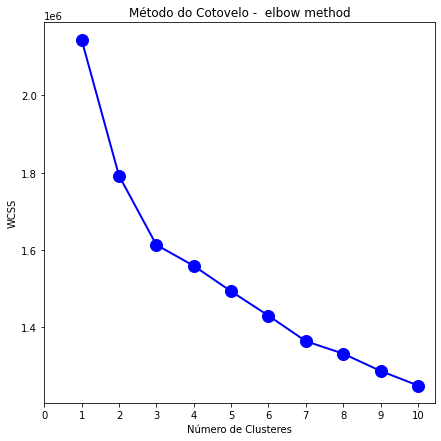

In [45]:
#método do cotovelo

wcss = []

for i in range(1,11):
    kmeans = KMeans (n_clusters=i,
                    init='random') 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),wcss, linewidth=2, markersize=12,marker='o',color = 'blue')
plt.title("Método do Cotovelo -  elbow method")
plt.xticks(np.arange(11))
plt.xlabel("Número de Clusteres")
plt.ylabel("WCSS")
plt.show()

Como podemos ver, a "curva do cotovelo" determina que o número de clusters é 3. Agora iremos desenvolver o modelo com o parâmetro k.

In [46]:
#criação do modelo 
kmeans = KMeans(n_clusters = 3, init='random', 
            max_iter = 300, 
            n_init = 10, 
            random_state = 0)

In [47]:
#cria o modelo de clusterização para agrupar os nossos dados 
kmeans.fit(X)

KMeans(init='random', n_clusters=3, random_state=0)

In [48]:
#mostra quais as coordenadas de cada centroid
kmeans.cluster_centers_

array([[ 0.64051262, -0.20851441,  0.20217331, ...,  0.05290915,
         0.20851441, -0.14586499],
       [-0.48038446,  0.24642613,  1.06070726, ..., -0.09459514,
        -0.20851441,  0.49063679],
       [-0.09607689, -0.00834058, -0.56375438, ...,  0.01622547,
        -0.00834058, -0.14586499]])

In [49]:
#quantidade de clusters
kmeans.n_clusters

3

In [50]:
#mostra as labels
labels = kmeans.labels_
labels 

array([1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0,
       2, 2, 2, 0])

<div>
<img src="images/fase5.png" height="350"  width="1500" />
</div>

Para a avaliação dos clusters, iremos utilizar métricas para avaliar o modelo. Para o problema de agrupament, iremos utilizar o ***Silhouete Score ou Coeficiente de Silhueta***. Nessa métrica, o valor varia de -1 a 1. Onde:
-  1: Indica que os clusters estão bem separados uns dos outros e distinguidos 
-  0: Indica que os clusters estão indiferentes, podemos concluir que a distância entre eles não é significativa.
- -1: Indica que os clusters estão distribuídos de maneira incorreta.  

Conforme verificamos pelo método do cotovelo, que o *n_clusters = 2* é o mais favorável para obter um bom agrupamento. Iremos validar com o a Silhouete Score iterando entre 2 ~ 10 clusters e analisar seu valor.


In [51]:
for i in range(3, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(X)
    score = silhouette_score(X, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

Silhueta para 3 clusters : 0.12177055938686349
Silhueta para 4 clusters : 0.1205163427382107
Silhueta para 5 clusters : 0.05325700900056159
Silhueta para 6 clusters : 0.04705102330986083
Silhueta para 7 clusters : 0.031102314588463728
Silhueta para 8 clusters : 0.03811906018598549
Silhueta para 9 clusters : 0.045126312980994544
Silhueta para 10 clusters : 0.03648213730369288


Como podemos obervar, o que *score* que é próximo de 1 é quando *n_clusters=3*. Dessa forma, iremos trabalhar o modelo com essa quantidade de clusters.

In [52]:
#confirmado a quantidade avaliada pelo Silhouete Score
label = kmeans.fit_predict(X)

In [64]:
#cria um copia para o resultado final
df_final = df_copy

#criar uma coluna indicando a familia do indivíduo
df_final['CLUSTER'] = label

In [65]:
#quantidade de individuos em cada família
df_final['CLUSTER'].value_counts()

2    25
0    12
1    11
Name: CLUSTER, dtype: int64

In [66]:
#visualiza as primeiras linhas 
df_final.head()

ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  \
H223                0                0             1216              189   
H224                0                0             1228              114   
H225                0                0             1022              110   
H226                1                0              912              289   
H227                0                0              491              186   

      ENSG00000000460  ENSG00000000938  ENSG00000000971  ENSG00000001036  \
H223               74            31895                2              763   
H224               38            23361                3              712   
H225               55            27944                0              956   
H226              127            41846                6             1104   
H227               30            11929               14              136   

      ENSG00000001084  ENSG00000001167  ...  ENSG00000281892  ENSG00000281896  \
H223             8963             1589  ...                1               19   
H224            26794             1734  ...                0               18   
H225             8027             1341  ...                0               11   
H226              716             1053  ...                0               23   
H227              745              730  ...                0                7   

      ENSG00000281899  ENSG00000281903  ENSG00000281904  ENSG00000281909  \
H223                0               18                0                0   
H224                0                0                0                0   
H225                0               10                0                0   
H226                0               36                0                0   
H227                1               17                0                0   

      ENSG00000281912  ENSG00000281918  ENSG00000281920  CLUSTER  
H223                1                0                0        1  
H224                1                0                0        1  
H225                0                0                0        1  
H226                2                0                0        0  
H227                0                0                0        2  

[5 rows x 44679 columns]

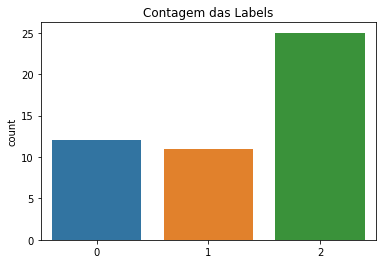

In [67]:
#plotagem das labels
sns.countplot(label)
plt.title("Contagem das Labels")
plt.show()

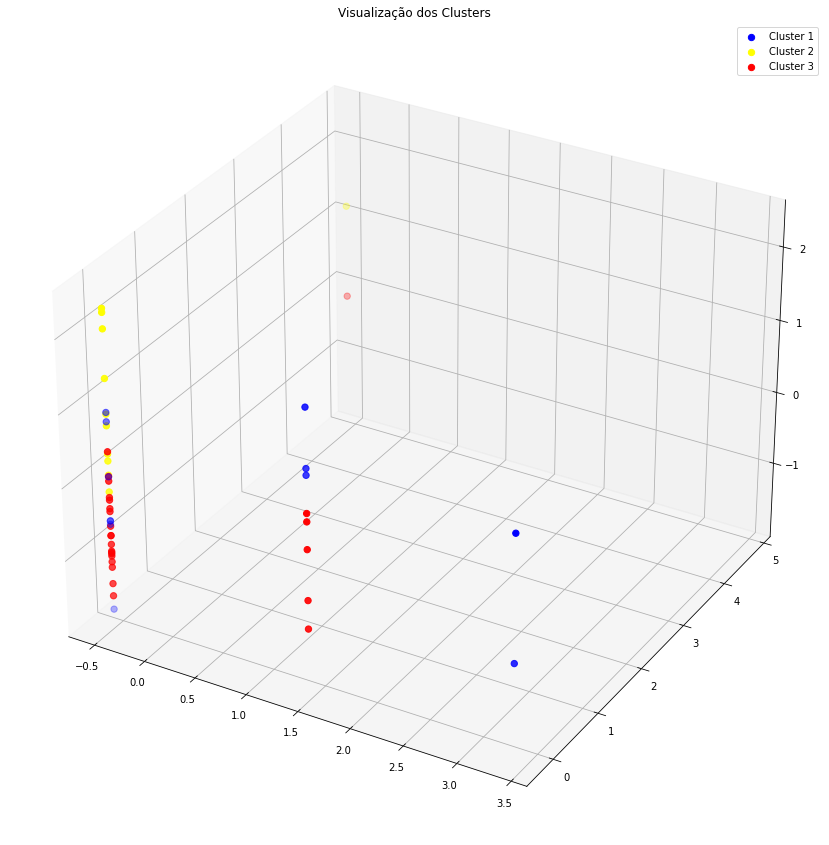

In [68]:
#apresentação da clusterização em 3D
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2], s = 40 , color = 'blue', label = "Cluster 1")
ax.scatter(X[label == 1,0],X[label == 1,1],X[label== 1,2], s = 40 , color = 'yellow', label = "Cluster 2")
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2], s = 40 , color = 'red', label = "Cluster 3")
plt.title('Visualização dos Clusters')
ax.legend()
plt.show()

In [69]:
#apresentação dos resultados
familias = df_final["CLUSTER"].unique()

print("Famílias -- Indíviduos\n".center(140))
for ind in familias:
  individuos = df_final[df_final["CLUSTER"] == ind]
  print(f"Família {int(ind) + 1} : {individuos.index.values}\n")
  print(f"Total de Indivíduos da Família: {len(individuos)}\n")

                                                          Famílias -- Indíviduos
                                                           
Família 2 : ['H223' 'H224' 'H225' 'H235' 'H236' 'H247' 'H248' 'H249' 'H259' 'H260'
 'H261']

Total de Indivíduos da Família: 11

Família 1 : ['H226' 'H230' 'H234' 'H238' 'H242' 'H246' 'H250' 'H254' 'H258' 'H262'
 'H266' 'H270']

Total de Indivíduos da Família: 12

Família 3 : ['H227' 'H228' 'H229' 'H231' 'H232' 'H233' 'H237' 'H239' 'H240' 'H241'
 'H243' 'H244' 'H245' 'H251' 'H252' 'H253' 'H255' 'H256' 'H257' 'H263'
 'H264' 'H265' 'H267' 'H268' 'H269']

Total de Indivíduos da Família: 25



### Referências
- Ciclo de vida dos dados #2 - https://medium.com/@kvmoura/crisp-dm-79580b0d3ac4
- Você sabe o que é CRISP-DM ? - https://medium.com/bexs-io/você-sabe-o-que-é-crisp-dm-a3c15975bd4c
- Using CRISP-DM to Grow as Data Scientist - https://towardsdatascience.com/using-crisp-dm-to-grow-as-data-scientist-a07ce3fd9d56
- DNA: saiba as suas principais características e funções - https://www.nilofrantz.com.br/dna-caracteristicas-e-funcoes/
- K-means: o que é, como funciona, aplicações e exemplo em Python - https://medium.com/programadores-ajudando-programadores/k-means-o-que-é-como-funciona-aplicações-e-exemplo-em-python-6021df6e2572
- Entenda o Algoritmo K-means e Saiba como Aplicar essa Técnica - https://minerandodados.com.br/entenda-o-algoritmo-k-means/ 
- KMeans Clustering for Classification - https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a